In [58]:
# Option 1: Access Endpoint from commandline

! curl -X 'POST' \
    'http://127.0.0.1:8000/classification' \
    -H 'accept: application/json' \
    -H 'Content-Type: application/json' \
    -d '{"text":"Martin is a nice guy. He enjoys doing linear optimization.", \
         "labels":["maths","sport","job"], \
         "model": "zero-shot"}'

{"labels":["maths","job"]}

In [50]:
# Option 1: Access Endpoint from commandline

! curl -X 'POST' \
    'http://127.0.0.1:8000/classification' \
    -H 'accept: application/json' \
    -H 'Content-Type: application/json' \
    -d '{"text":"John Doe is a Go Developer at Google. He has been working there for 10 years and has been awarded employee of the year.", \
         "labels":["job", "nature", "space"], \
         "model": "zero-shot"}'

{"labels":["job"]}

In [49]:
# Option 1: Access Endpoint from commandline

! curl -X 'POST' \
    'http://127.0.0.1:8000/classification' \
    -H 'accept: application/json' \
    -H 'Content-Type: application/json' \
    -d '{"text":"John Doe is a Go Developer at Google. He has been working there for 10 years and has been awarded employee of the year.", \
         "model": "zero-shot"}'

{"labels":["scientific_report","file_folder","specification","letter","form","presentation"]}

In [47]:
# Option 2: Access Endpoint from Python Env

import requests as r
import json
from requests.structures import CaseInsensitiveDict

headers = CaseInsensitiveDict()
headers["Accept"] = "application/json"
headers["Content-Type"] = "application/json"

url = "http://127.0.0.1:8000/classification"


text = "John Doe is a Go Developer at Google. He has been working there for 10 years and has been awarded employee of the year."
labels = ["job", "nature", "space"]

# text = open('demo2.txt','r').read()
# labels = ["job", "fiction", "space","research"]


response = r.post(url,
                  headers = headers,
                  data = json.dumps({"text":text,"labels":labels}))

print(response.json())

{'labels': ['job', 'space', 'nature'], 'scores': [0.9511086344718933, 0.028026724234223366, 0.02086460217833519]}


In [ ]:
CORPUS_DIR = os.path.join(DATASET_DIR, 'multi-eurlex', 'corpus')
LANGS = ['en', 'bg', 'cs', 'da', 'de', 'el', 'es', 'et', 'fi', 'fr', 'hr', 'hu',
         'it', 'lt', 'lv', 'mt', 'nl', 'pl', 'pt', 'ro', 'sk', 'sl', 'sv']

filenames = []
for SUBSET in ['train', 'dev', 'test']:
    with open(os.path.join(DATASET_DIR, 'multi-eurlex', f'multi_eurlex_{SUBSET}_ids.json')) as file:
        filenames += [os.path.join(CORPUS_DIR, f'{idx}.json') for idx in json.load(file)]


with open(os.path.join(DATASET_DIR, 'multi-eurlex', 'eurovoc_concepts.json')) as file:
    eurovoc_concepts = json.load(file)
    eurovoc_concepts.pop('level_4', None)
    eurovoc_concepts.pop('level_5', None)
    eurovoc_concepts.pop('level_6', None)
    eurovoc_concepts.pop('level_7', None)
    eurovoc_concepts.pop('level_8', None)

avg_concepts = {key: [] for key in eurovoc_concepts.keys()}
unique_concepts = {key: set() for key in eurovoc_concepts.keys()}
count_concepts = {key: [] for key in eurovoc_concepts.keys()}
for filename in tqdm.tqdm(filenames):
    with open(filename) as file:
        data = json.load(file)
    for key in avg_concepts.keys():
        avg_concepts[key].append(len(data['concepts'][key]))
        unique_concepts[key].update(data['concepts'][key])
        count_concepts[key].extend(data['concepts'][key])

for key, value in avg_concepts.items():
    print(f'{key:<10}\t{len(eurovoc_concepts[key]):<4}\t\t{len(unique_concepts[key]):<4}\t{np.mean(value):.1f}')

for key, values in count_concepts.items():
    counts = Counter(values)
    freq = sum([1 for key_1, value in counts.items() if value >= 10])
    infreq = len(eurovoc_concepts[key]) - freq
    print(f'{key:<10}\t{freq}\t{infreq}')

In [114]:
[eurovoc_concepts[n]['en'] for n in classlabel.names]

['social questions',
 'industry',
 'finance',
 'trade',
 'business and competition',
 'international relations',
 'agriculture, forestry and fisheries',
 'production, technology and research',
 'transport',
 'employment and working conditions',
 'politics',
 'law',
 'education and communications',
 'international organisations',
 'energy',
 'EUROPEAN UNION',
 'science',
 'agri-foodstuffs',
 'geography',
 'economics',
 'environment']

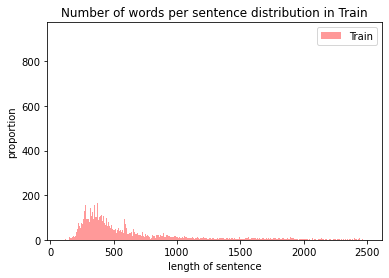

In [12]:
import matplotlib.pyplot as plt

train_sent_len = [len(i.split()) for i in dataset_train['text']]

plt.hist(train_sent_len, bins=range(min(train_sent_len), 2500 + 1, 1), 
              alpha=0.4, color="red")


labels = ['Train']
plt.legend(labels)
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("Number of words per sentence distribution in Train")
plt.show()

In [61]:
from sklearn import metrics

metrics.f1_score??

In [ ]:
for param_name in sorted(parameters.keys()):
    logging.info("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

In [ ]:
    def get_labels(data, mlb):
        return mlb.transform(data['labels']).tolist()

    def add_zero_class(labels):
        augmented_labels = np.zeros((len(labels), len(labels[0]) + 1), dtype=np.int32)
        augmented_labels[:, :-1] = labels
        augmented_labels[:, -1] = (np.sum(labels, axis=1) == 0).astype('int32')
        return augmented_labels

In [64]:
EURALEX_LABELS_LIST = [
    'social questions',
    'industry',
    'finance',
    'trade',
    'business and competition',
    'international relations',
    'agriculture',
    'forestry and fisheries',
    'production',
    'technology and research',
    'transport',
    'employment and working conditions',
    'politics',
    'law',
    'education and communications',
    'international organisations',
    'energy',
    'European Union',
    'science',
    'agri-foodstuffs',
    'geography',
    'economics',
    'environment']

In [107]:
# Global Evaluation Variables

def get_labels(pred, mlb):
        return mlb.transform([pred])[0]
    
def add_zero_class(labels):
        augmented_labels = np.zeros((len(labels), len(labels[0]) + 1), dtype=np.int32)
        augmented_labels[:, :-1] = labels
        augmented_labels[:, -1] = (np.sum(labels, axis=1) == 0).astype('int32')
        return augmented_labels

EURALEX_LABELS_LIST = ['a','b','c']

mlb = MultiLabelBinarizer(classes=EURALEX_LABELS_LIST)
mlb = mlb.fit(y=[EURALEX_LABELS_LIST])
y_pred_svm,y_pred_zero,y_true = [],[],[]



y_pred_svm.append(get_labels(['a'], mlb))
y_pred_zero.append(get_labels(['b'], mlb))
y_true.append(get_labels(['a'], mlb))

# Global Evaluation    
y_true = add_zero_class(np.array(y_pred_svm))
y_pred_svm = add_zero_class(np.array(y_pred_svm))
y_pred_zero = add_zero_class(np.array(y_pred_zero))
print(f'Micro-F1 - SVM: {metrics.f1_score(y_true, y_pred_svm, average="micro")*100:.1f}')
print(f'Macro-F1 - SVM: {metrics.f1_score(y_true, y_pred_svm, average="macro")*100:.1f}')
print(f'Micro-F1 - Zero-Shot: {metrics.f1_score(y_true, y_pred_zero, average="micro")*100:.1f}')
print(f'Macro-F1 - Zero-Shot: {metrics.f1_score(y_true, y_pred_zero, average="macro")*100:.1f}')

[[0 0 0 0]]
[[0 0 0 0]]
[[0 0 0 0]]
Micro-F1 - SVM: 100.0
Macro-F1 - SVM: 25.0
Micro-F1 - Zero-Shot: 0.0
Macro-F1 - Zero-Shot: 0.0


/Users/gauthierguinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
/Users/gauthierguinet/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1495: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


In [105]:
y_pred_svm

[array([[1, 0, 0]])]

In [104]:
np.array(y_pred_svm).shape

(1, 1, 3)

In [101]:
len(np.array(y_pred_svm)[0])

1

In [99]:
np.zeros((len(np.array(y_pred_svm)), len(np.array(y_pred_svm)[0]) + 1), dtype=np.int32)

array([[0, 0]], dtype=int32)

In [96]:
np.array(y_pred_svm)

array([[[1, 0, 0]]])

In [ ]:
len()